In [44]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [4]:
%matplotlib inline

## Exponential distribution

In [5]:
lambdas = [.25, .5, 1, 5]

In [6]:
e_arr = np.random.uniform(size=10000)

In [7]:
df_exponential = pd.DataFrame()

In [8]:
for lambda_i in lambdas:
    x = (-1/lambda_i) * np.log(e_arr)
    df_exponential[str(lambda_i)] = x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbc251f518>,
      dtype=object)

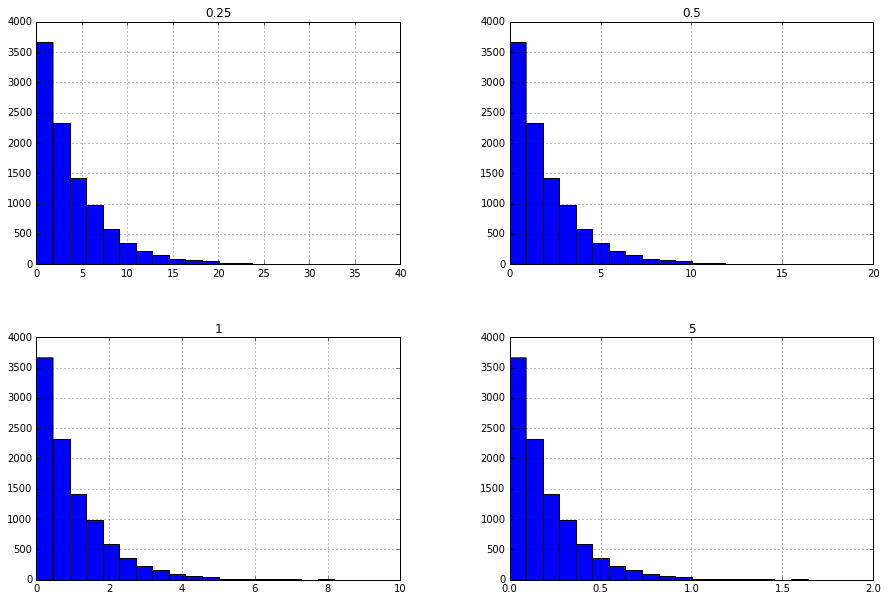

In [9]:
df_exponential.hist(bins=20, figsize=(15, 10))

In [11]:
df_exponential.mean()

0.25    4.023775
0.5     2.011887
1       1.005944
5       0.201189
dtype: float64

In [14]:
df_exponential.std()

0.25    4.077428
0.5     2.038714
1       1.019357
5       0.203871
dtype: float64

In [13]:
df_exponential.std() ** 2

0.25    16.625417
0.5      4.156354
1        1.039089
5        0.041564
dtype: float64

In [ ]:
def exp_distr(lambda_val, x):
    return 1 - np.e ** (-lambda_val * x)

In [45]:
n_pow_fr = 20 - 1 - 1

In [54]:
crit = stats.chi2.ppf(q = 0.95, df = n_pow_fr)  
crit

28.869299430392626

In [101]:
for lambda_val in lambdas:
    df_exponential_stats = pd.DataFrame(
        df_exponential[str(lambda_val)]
    ).assign(Bin=lambda x: pd.cut(x[str(lambda_val)], bins=20)
            ).groupby(['Bin']
                     ).agg({str(lambda_val): ['count']})
    df_exponential_stats.columns = ['count']
    df_exponential_stats = df_exponential_stats.reset_index()
    df_exponential_stats['expected'] = df_exponential_stats['Bin'].apply(
        lambda x: exp_distr(lambda_val, x.right) - exp_distr(lambda_val, x.left)
    ).astype(float)*10000
    chi_square = (((df_exponential_stats['count'] - df_exponential_stats['expected']) ** 2) / df_exponential_stats['expected']).sum()
    print('Lambda:', lambda_val, '; chi-square: ', chi_square)

Lambda: 0.25 ; chi-square:  27.051760608888042
Lambda: 0.5 ; chi-square:  27.063051347794413
Lambda: 1 ; chi-square:  27.053699684266746
Lambda: 5 ; chi-square:  27.063051347794527


## Normal distribution

In [15]:
a_sigma = [(0, 1), (0, 5), (-1, 3), (1, 3)]

In [16]:
e_arr = np.random.uniform(size=(10000, 12))

In [17]:
mu_arr = np.sum(e_arr, axis=1) - 6

In [18]:
df_normal = pd.DataFrame()

In [105]:
for a, sigma in a_sigma:
    x = sigma * mu_arr + a
    df_normal[str(param_pair)] = x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbad7df898>,
      dtype=object)

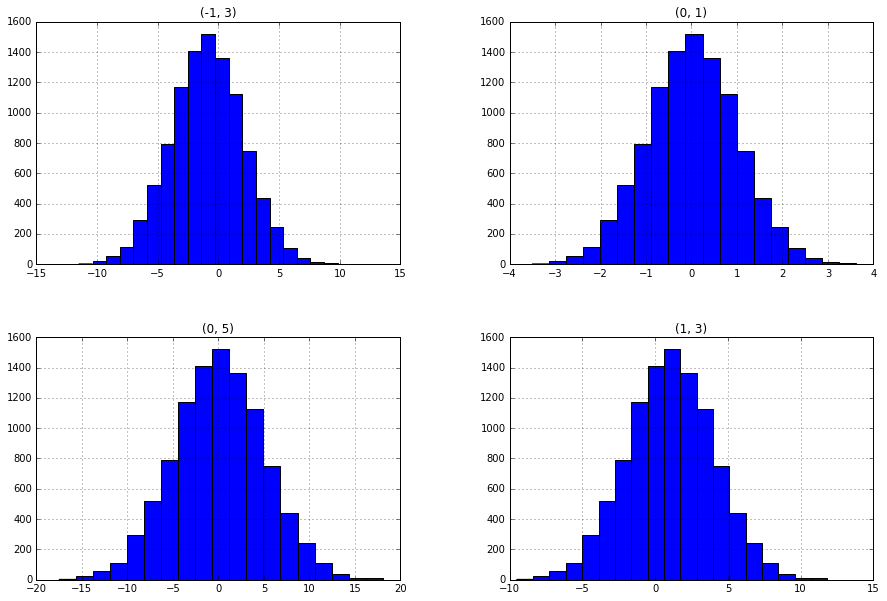

In [106]:
df_normal.hist(bins=20, figsize=(15, 10))

In [107]:
df_normal.mean()

(0, 1)     0.016726
(0, 5)     0.083631
(-1, 3)   -0.949822
(1, 3)     1.050178
dtype: float64

In [108]:
df_normal.std()

(0, 1)     0.988261
(0, 5)     4.941305
(-1, 3)    2.964783
(1, 3)     2.964783
dtype: float64

In [109]:
df_normal.std() ** 2

(0, 1)      0.976660
(0, 5)     24.416492
(-1, 3)     8.789937
(1, 3)      8.789937
dtype: float64

In [127]:
def norm_distr(a, sigma, x):
    return stats.norm.cdf((x - a)/sigma) - 0.5#np.exp(-((x-a)**2)/(2 * sigma**2))/(sigma * np.sqrt(2*np.pi))

In [128]:
n_pow_fr = 20 - 1 - 2

In [129]:
crit = stats.chi2.ppf(q = 0.95, df = n_pow_fr)  
crit

27.587111638275324

In [130]:
for a, sigma in a_sigma:
    df_norm_stats = pd.DataFrame(
        df_normal[str((a, sigma))]
    ).assign(Bin=lambda x: pd.cut(x[str((a, sigma))], bins=20)
            ).groupby(['Bin']
                     ).agg({str((a, sigma)): ['count']})
    df_norm_stats.columns = ['count']
    df_norm_stats = df_norm_stats.reset_index()
    df_norm_stats['expected'] = df_norm_stats['Bin'].apply(
        lambda x: norm_distr(a, sigma, x.right) - norm_distr(a, sigma, x.left)
    ).astype(float)*10000
    chi_square = (((df_norm_stats['count'] - df_norm_stats['expected']) ** 2) / df_norm_stats['expected']).sum()
    print('a:', a, 'sigma:', sigma, '; chi-square: ', chi_square)

a: 0 sigma: 1 ; chi-square:  18.16060977512681
a: 0 sigma: 5 ; chi-square:  18.330875194703196
a: -1 sigma: 3 ; chi-square:  18.27837254293354
a: 1 sigma: 3 ; chi-square:  18.278372542933624


## Congruent method

In [27]:
a_c_pairs = [(5**13, 2**31), (5**7, 2**15), (5**7, 2**13)]

In [28]:
tmp = []

In [32]:
df_congr = pd.DataFrame()

In [33]:
for pair in a_c_pairs:
    a, c = pair
    z_i = 11
    n_generated = []
    for i in range(10000):
        x_i = z_i / c
        z_i = (a*z_i) % c
        n_generated.append(x_i)
    df_congr[str(pair)] = n_generated

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbf870a58>,
      dtype=object)

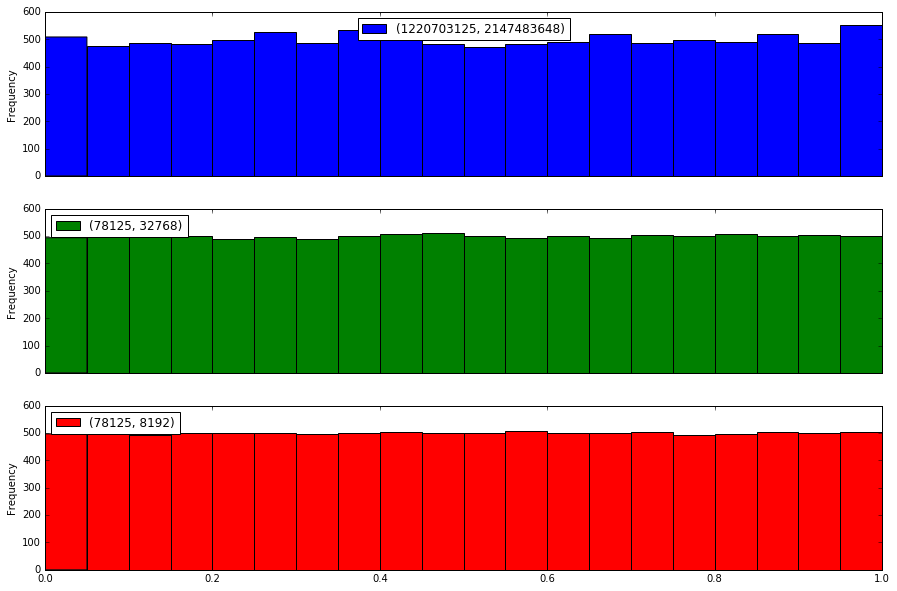

In [39]:
df_congr.plot.hist(bins=20, subplots=True, figsize=(15, 10))

In [40]:
df_congr.mean()

(1220703125, 2147483648)    0.502524
(78125, 32768)              0.500646
(78125, 8192)               0.500583
dtype: float64

In [41]:
df_congr.std()

(1220703125, 2147483648)    0.289543
(78125, 32768)              0.288779
(78125, 8192)               0.288592
dtype: float64

In [43]:
1 / (2 * 3**.5)

0.2886751345948129

In [131]:
n_pow_fr = 20 - 1 - 2

In [132]:
crit = stats.chi2.ppf(q = 0.95, df = n_pow_fr)  
crit

27.587111638275324

In [134]:
for a, b in a_c_pairs:
    df_unif_stats = pd.DataFrame(
        df_congr[str((a, b))]
    ).assign(Bin=lambda x: pd.cut(x[str((a, b))], bins=20)
            ).groupby(['Bin']
                     ).agg({str((a, b)): ['count']})
    df_unif_stats.columns = ['count']
    df_unif_stats = df_unif_stats.reset_index()
    df_unif_stats['expected'] = 10000/20
    chi_square = (((df_norm_stats['count'] - df_norm_stats['expected']) ** 2) / df_norm_stats['expected']).sum()
    print('a:', df_congr[str((a, b))].min(), 'b:', df_congr[str((a, b))].max(), '; chi-square: ', chi_square)

a: 5.122274160385132e-09 b: 0.9999452973715961 ; chi-square:  18.278372542933624
a: 9.1552734375e-05 b: 0.999969482421875 ; chi-square:  18.278372542933624
a: 0.0003662109375 b: 0.9998779296875 ; chi-square:  18.278372542933624
